In [6]:
# Pairs Trading Performance Analysis
# Zelle 1: CSV-Dateien einlesen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def load_performance_data():
    try:
        # NASDAQ-100 Ergebnisse
        n100_data = pd.read_csv('NASDAQ100_strategy_comparison.csv')
        print(f"N100 Daten geladen: {n100_data.shape}")
        
        # FTSE-100 Ergebnisse  
        f100_data = pd.read_csv('FTSE100_strategy_comparison.csv')
        print(f"F100 Daten geladen: {f100_data.shape}")
        
        return n100_data, f100_data
        
    except FileNotFoundError as e:
        print(f"Datei nicht gefunden: {e}")
        print("Bitte stelle sicher, dass die CSV-Dateien im gleichen Verzeichnis sind")
        return None, None

n100_results, f100_results = load_performance_data()

if n100_results is not None:
    print("\n=== NASDAQ-100 Datenstruktur ===")
    print(n100_results.head())
    print(f"Spalten: {list(n100_results.columns)}")

if f100_results is not None:
    print("\n=== FTSE-100 Datenstruktur ===")
    print(f100_results.head())
    print(f"Spalten: {list(f100_results.columns)}")

N100 Daten geladen: (6, 26)
F100 Daten geladen: (6, 26)

=== NASDAQ-100 Datenstruktur ===
                          strategy     market  total_trades  profitable_days  \
0        Cluster_Bollinger_Sliding  NASDAQ100           928              115   
1          Cluster_Z-Score_Sliding  NASDAQ100          1312              136   
2          CoInt_Bollinger_Sliding  NASDAQ100          6378               47   
3            CoInt_Z-Score_Sliding  NASDAQ100          2118               45   
4  GradientBoost_Bollinger_Sliding  NASDAQ100          2034              144   

   total_days  max_drawdown  sharpe_ratio  final_performance  initial_capital  \
0         364     -0.000454      7.008241           0.135292         100000.0   
1         365     -0.000887      7.481132           0.179782         100000.0   
2         361     -0.119923      0.626312          -0.112056         100000.0   
3         352     -0.038673      1.028177          -0.011327         100000.0   
4         364     -0.001

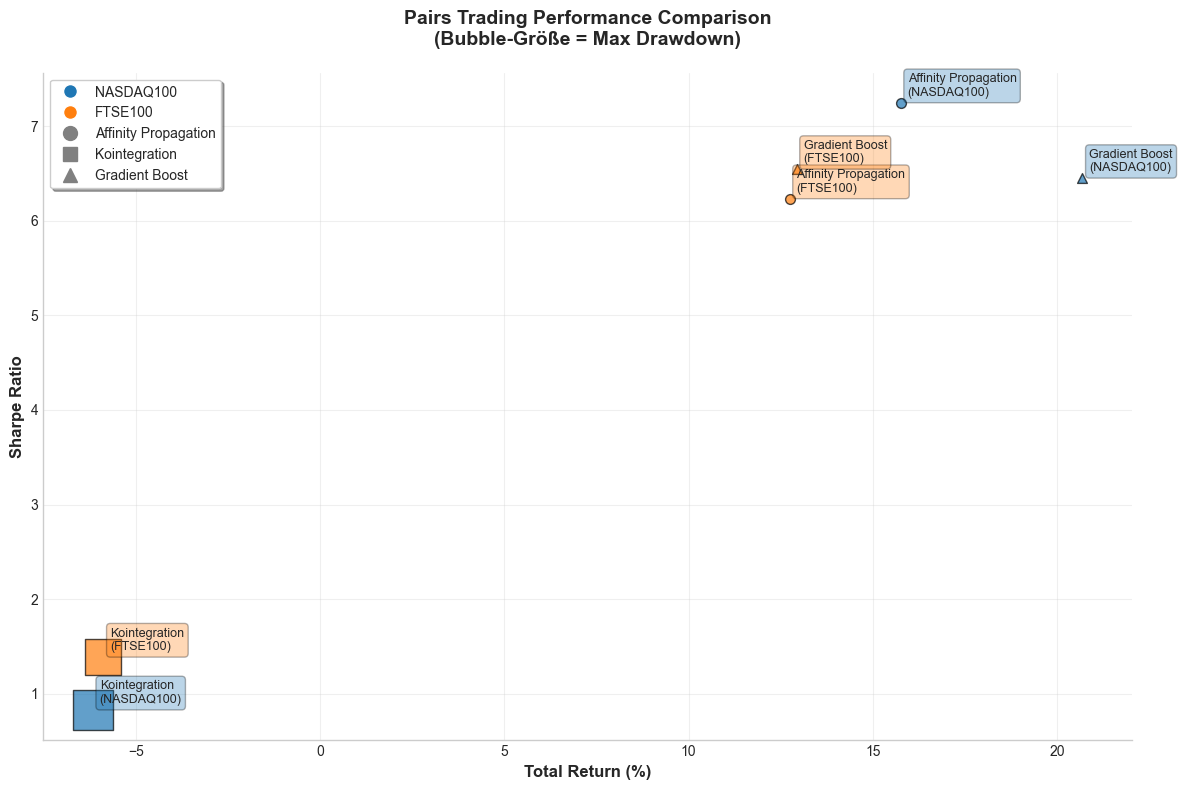


=== Performance Ranking ===
                                total_return_pct  sharpe_ratio  \
approach             market                                      
Gradient Boost       NASDAQ100            20.685         6.448   
Affinity Propagation NASDAQ100            15.754         7.245   
Gradient Boost       FTSE100              12.930         6.543   
Affinity Propagation FTSE100              12.740         6.231   
Kointegration        FTSE100              -5.882         1.385   
                     NASDAQ100            -6.169         0.827   

                                abs_max_drawdown  
approach             market                       
Gradient Boost       NASDAQ100             0.001  
Affinity Propagation NASDAQ100             0.001  
Gradient Boost       FTSE100               0.001  
Affinity Propagation FTSE100               0.001  
Kointegration        FTSE100               0.070  
                     NASDAQ100             0.079  


In [8]:
# Zelle 3: Bubble Chart erstellen
def create_performance_bubble_chart(bubble_df):
    """
    Erstellt einen Bubble Chart für die Performance-Analyse
    """
    # Figure setup
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Farben für Märkte
    market_colors = {'NASDAQ100': '#1f77b4', 'FTSE100': '#ff7f0e'}
    
    # Marker für Ansätze
    approach_markers = {
        'Affinity Propagation': 'o',
        'Kointegration': 's', 
        'Gradient Boost': '^'
    }
    
    # Bubble Chart erstellen
    for market in bubble_df['market'].unique():
        for approach in bubble_df['approach'].unique():
            # Daten für diese Kombination filtern
            subset = bubble_df[(bubble_df['market'] == market) & 
                              (bubble_df['approach'] == approach)]
            
            if len(subset) > 0:
                # Durchschnittswerte berechnen
                avg_return = subset['total_return_pct'].mean()
                avg_sharpe = subset['sharpe_ratio'].mean()
                avg_drawdown = subset['abs_max_drawdown'].mean()
                
                # Bubble-Größe (Max Drawdown * 10000 für bessere Sichtbarkeit)
                bubble_size = max(50, avg_drawdown * 10000)
                
                # Plot erstellen
                scatter = ax.scatter(
                    avg_return, avg_sharpe, 
                    s=bubble_size,
                    c=market_colors[market],
                    marker=approach_markers[approach],
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=1,
                    label=f"{approach} ({market})"
                )
                
                # Annotationen hinzufügen
                ax.annotate(
                    f"{approach}\n({market})",
                    (avg_return, avg_sharpe),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left',
                    bbox=dict(boxstyle='round,pad=0.3', 
                             facecolor=market_colors[market], 
                             alpha=0.3)
                )
    
    # Achsen-Labels und Titel
    ax.set_xlabel('Total Return (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Sharpe Ratio', fontsize=12, fontweight='bold')
    ax.set_title('Pairs Trading Performance Comparison\n(Bubble-Größe = Max Drawdown)', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Grid und Styling
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Legende erstellen
    legend_elements = []
    
    # Märkte
    for market, color in market_colors.items():
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=color, markersize=10,
                                        label=market))
    
    # Ansätze  
    for approach, marker in approach_markers.items():
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color='gray', 
                                        markersize=10, linestyle='None',
                                        label=approach))
    
    ax.legend(handles=legend_elements, loc='upper left', frameon=True, 
             fancybox=True, shadow=True)
    
    # Layout optimieren
    plt.tight_layout()
    
    return fig, ax

# Bubble Chart erstellen und anzeigen
if 'bubble_df' in locals():
    fig, ax = create_performance_bubble_chart(bubble_df)
    plt.show()
    
    # Zusätzliche Statistiken ausgeben
    print("\n=== Performance Ranking ===")
    ranking = bubble_df.groupby(['approach', 'market']).agg({
        'total_return_pct': 'mean',
        'sharpe_ratio': 'mean',
        'abs_max_drawdown': 'mean'
    }).round(3)
    
    # Nach Total Return sortieren
    ranking_sorted = ranking.sort_values('total_return_pct', ascending=False)
    print(ranking_sorted)
else:
    print("Fehler: bubble_df nicht gefunden. Bitte führe erst Zelle 2 aus.")

In [9]:
# Zelle 4: Performance Ranking Tabelle erstellen

def create_performance_ranking(bubble_df, sort_by='total_return_pct'):
    """
    Erstellt eine Ranking-Tabelle aller Strategien
    
    Parameters:
    sort_by: 'total_return_pct', 'sharpe_ratio', oder 'abs_max_drawdown' (ascending)
    """
    
    # Kopie der Daten erstellen
    ranking_df = bubble_df.copy()
    
    # Nach gewählter Metrik sortieren
    if sort_by == 'abs_max_drawdown':
        # Bei Drawdown: kleiner = besser (ascending)
        ranking_df = ranking_df.sort_values(sort_by, ascending=True)
    else:
        # Bei Return/Sharpe: größer = besser (descending)  
        ranking_df = ranking_df.sort_values(sort_by, ascending=False)
    
    # Ranking-Spalte hinzufügen
    ranking_df = ranking_df.reset_index(drop=True)
    ranking_df['Rank'] = range(1, len(ranking_df) + 1)
    
    # Relevante Spalten auswählen und umbenennen
    result_df = ranking_df[['Rank', 'approach', 'market', 'strategy_type', 
                           'total_return_pct', 'sharpe_ratio', 'max_drawdown']].copy()
    
    # Spalten umbenennen für bessere Lesbarkeit
    result_df.columns = ['Rank', 'Ansatz', 'Market', 'Strategy', 
                        'Return (%)', 'Sharpe Ratio', 'Max Drawdown (%)']
    
    # Prozent-Formatierung für Drawdown
    result_df['Max Drawdown (%)'] = (result_df['Max Drawdown (%)'] * 100).round(2)
    
    # Return und Sharpe runden
    result_df['Return (%)'] = result_df['Return (%)'].round(2)
    result_df['Sharpe Ratio'] = result_df['Sharpe Ratio'].round(2)
    
    return result_df

# Performance Ranking erstellen und ausgeben
if 'bubble_df' in locals():
    print("=" * 80)
    print("PAIRS TRADING PERFORMANCE RANKING")
    print("Sortiert nach: Total Return (%)")
    print("=" * 80)
    
    # Ranking nach Total Return
    ranking_table = create_performance_ranking(bubble_df, sort_by='total_return_pct')
    
    # Tabelle formatiert ausgeben
    print(ranking_table.to_string(index=False, 
                                 col_space={'Rank': 4, 'Ansatz': 20, 'Market': 8, 
                                           'Strategy': 9, 'Return (%)': 10, 
                                           'Sharpe Ratio': 12, 'Max Drawdown (%)': 16}))
    
    print("\n" + "=" * 80)
    print("ALTERNATIVE RANKINGS")
    print("=" * 80)
    
    # Zusätzlich: Ranking nach Sharpe Ratio
    print("\n--- Ranking nach Sharpe Ratio ---")
    sharpe_ranking = create_performance_ranking(bubble_df, sort_by='sharpe_ratio')
    print(sharpe_ranking[['Rank', 'Ansatz', 'Market', 'Strategy', 'Sharpe Ratio']].to_string(index=False))
    
    # Zusätzlich: Ranking nach niedrigstem Drawdown  
    print("\n--- Ranking nach niedrigstem Drawdown ---")
    drawdown_ranking = create_performance_ranking(bubble_df, sort_by='abs_max_drawdown')
    print(drawdown_ranking[['Rank', 'Ansatz', 'Market', 'Strategy', 'Max Drawdown (%)']].to_string(index=False))
    
else:
    print("Fehler: bubble_df nicht gefunden. Bitte führe erst die vorherigen Zellen aus.")

PAIRS TRADING PERFORMANCE RANKING
Sortiert nach: Total Return (%)
 Rank               Ansatz    Market  Strategy  Return (%)  Sharpe Ratio  Max Drawdown (%)
    1       Gradient Boost NASDAQ100   Z-Score       20.90          6.16             -0.11
    2       Gradient Boost NASDAQ100 Bollinger       20.47          6.73             -0.18
    3 Affinity Propagation NASDAQ100   Z-Score       17.98          7.48             -0.09
    4 Affinity Propagation   FTSE100   Z-Score       14.30          6.40             -0.09
    5       Gradient Boost   FTSE100   Z-Score       13.75          6.13             -0.09
    6 Affinity Propagation NASDAQ100 Bollinger       13.53          7.01             -0.05
    7       Gradient Boost   FTSE100 Bollinger       12.11          6.95             -0.09
    8 Affinity Propagation   FTSE100 Bollinger       11.18          6.06             -0.07
    9        Kointegration   FTSE100   Z-Score        0.81          2.67             -0.88
   10        Kointegrati